In [1]:
import matplotlib.pyplot as plt

import pandas 

import numpy 

In [130]:
city_data = pandas.read_csv("raw_data/city_data.csv")
#city_data

ride_data = pandas.read_csv("raw_data/ride_data.csv")
#ride_data

city_ride_data = pandas.merge(city_data, ride_data, how="left", on=["city", "city"])
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [131]:
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]
#urban_cities

suburban_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
#suburban_cities

rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]
rural_cities.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [103]:
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head()

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
#suburban_ride_count.head()

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
#rural_ride_count.head()


type
Rural    580968240341287
Name: ride_id, dtype: int64

In [132]:
urban_average_fare = urban_cities.groupby(["city"]).mean()["fare"]
#urban_average_fare.head()

suburban_average_fare = suburban_cities.groupby(["city"]).mean()["fare"]
#suburban_average_fare.head()

rural_average_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_average_fare.head()


city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [135]:
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
#urban_driver_count.head()

suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
#suburban_driver_count.head()

rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]
#rural_driver_count.head()


18

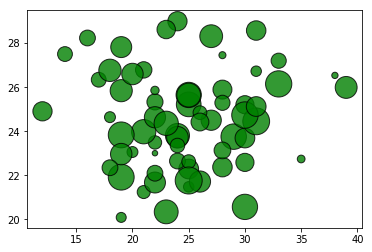

In [66]:
plt.scatter(urban_ride_count,
           urban_average_fare,
           s=10*urban_driver_count,c="green",
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Urban")

plt.show()

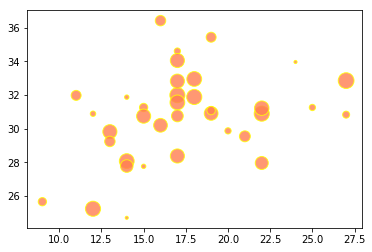

In [73]:
plt.scatter(suburban_ride_count,
           suburban_average_fare,
           s=10*suburban_driver_count,c="coral",
           edgecolor="yellow",linewidths=1,marker="o",
           alpha=0.8,label="Suburban")

plt.show()

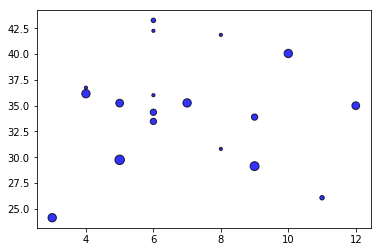

In [72]:
plt.scatter(rural_ride_count,
           rural_average_fare,
           s=10*rural_driver_count,c="blue",
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Rural")

plt.show()

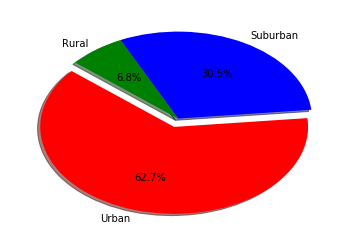

In [104]:
urban_total_fares_count = urban_cities.groupby(["type"]).sum()["fare"]
#urban_total_fares_count.head()

suburban_total_fares_count = suburban_cities.groupby(["type"]).sum()["fare"]
#suburban_total_fares_count.head()

rural_total_fares_count = rural_cities.groupby(["type"]).sum()["fare"]
#rural_total_fares_count.head()

labels = ["Urban", "Suburban","Rural"]

sizes = [urban_total_fares_count, suburban_total_fares_count,rural_total_fares_count] 
#[urban_average_fare,suburban_average_fare,rural_average_fare]

colors = ["red","blue","green"]

explode = (0.1,0,0)

plt.pie(sizes,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=140)
                   
plt.show()

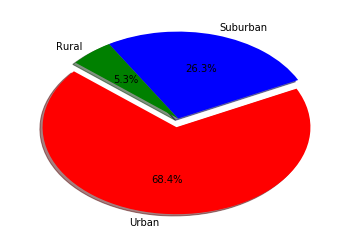

In [105]:
urban_total_rides_count = urban_cities.groupby(["type"]).count()["ride_id"]
#urban_total_rides_count.head()

suburban_total_rides_count = suburban_cities.groupby(["type"]).count()["ride_id"]
#suburban_total_rides_count.head()

rural_total_rides_count = rural_cities.groupby(["type"]).count()["ride_id"]
#rural_total_rides_count.head()

sizes = [urban_total_rides_count, suburban_total_rides_count,rural_total_rides_count]

plt.pie(sizes,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=140)
                   
plt.show()

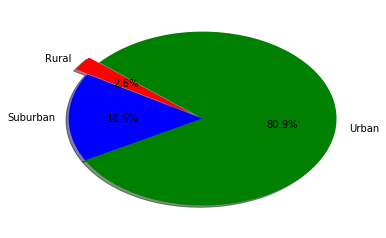

In [141]:
labels = ["Rural", "Suburban","Urban"]

plt.pie(city_data.groupby(["type"]).sum()["driver_count"],explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=140)
                   
plt.show()

In [138]:
city_ride_data = city_data.groupby(["type"]).sum()["driver_count"]
city_ride_data

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64